[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

# [RQ3] Do the all trips last the same? 

In [7]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions
import pylab as pyl

from time import time

In [3]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))

In [5]:
from importlib import reload
reload(functions)

<module 'functions' from '/Users/miguel/Desktop/HW2/ADMSecondHomework/functions.py'>

In [ ]:
def make_duration_df (df_names, taxi_zone_lookup):
    trip_duration = pd.DataFrame()

    for i, df_name in enumerate(df_names):

        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID'],
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'])

        # merge with look
        df = pd.merge(df,taxi_zone_lookup, how = "left", left_on="PULocationID", right_on= "LocationID")

        df.drop(['PULocationID', 'LocationID', 'Zone', 'service_zone'], axis=1, inplace=True)

        df['tpep_dropoff_datetime'] = round((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 'm'),2)

        df.drop('tpep_pickup_datetime',axis=1,inplace=True)

        trip_duration = trip_duration.append(df)

    trip_duration.rename(columns = {"tpep_dropoff_datetime":"durations"}, inplace=True)
    
    # delete durations >= 0
    trip_duration = trip_duration[trip_duration['durations']>0]
    return trip_duration

In [8]:
start = time()
df = functions.make_duration_df(df_names,taxi_zone_lookup)
print ("--->", time() - start )

---> 175.8000569343567


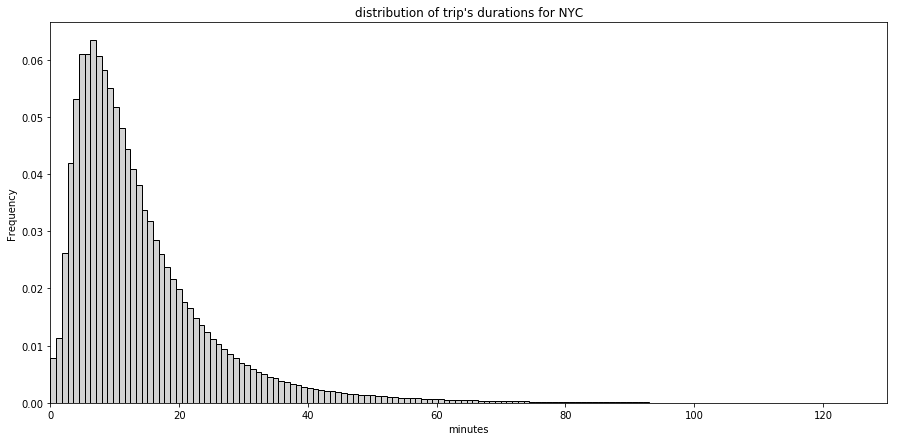

In [43]:
# plot the durations' density of whole NYC
functions.plot_durations(df,'NYC', bins=10000)

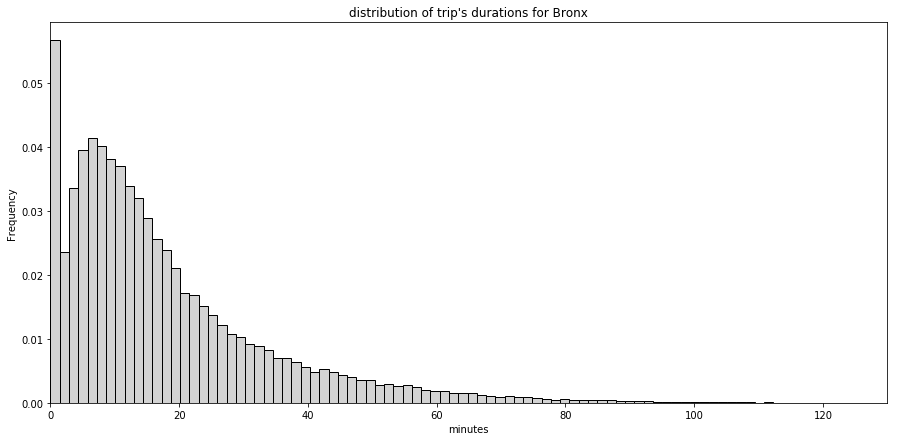

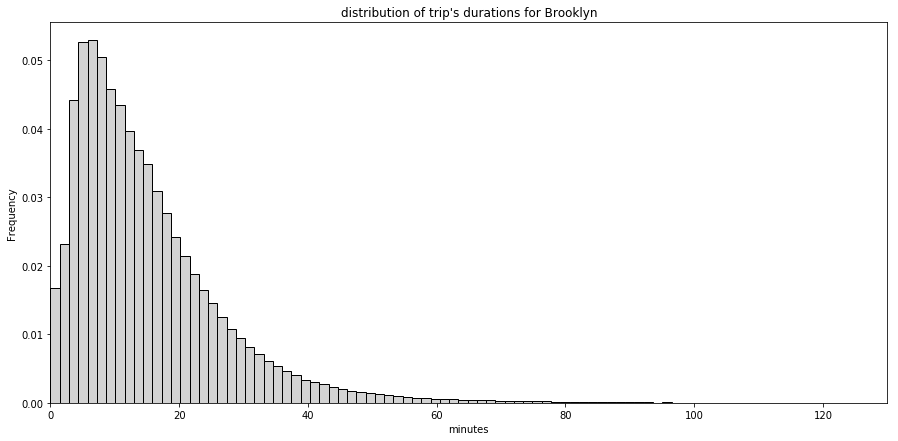

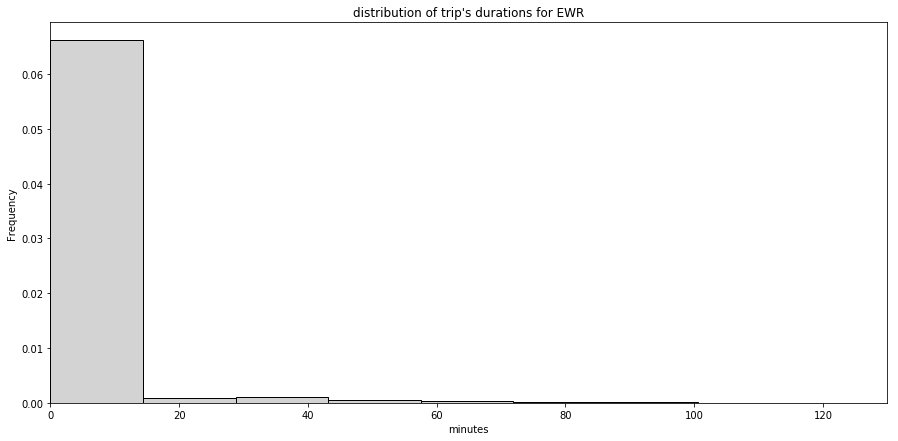

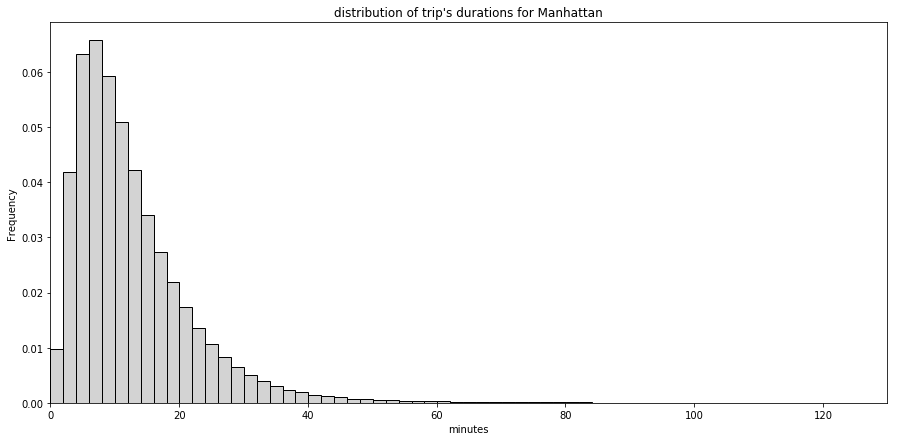

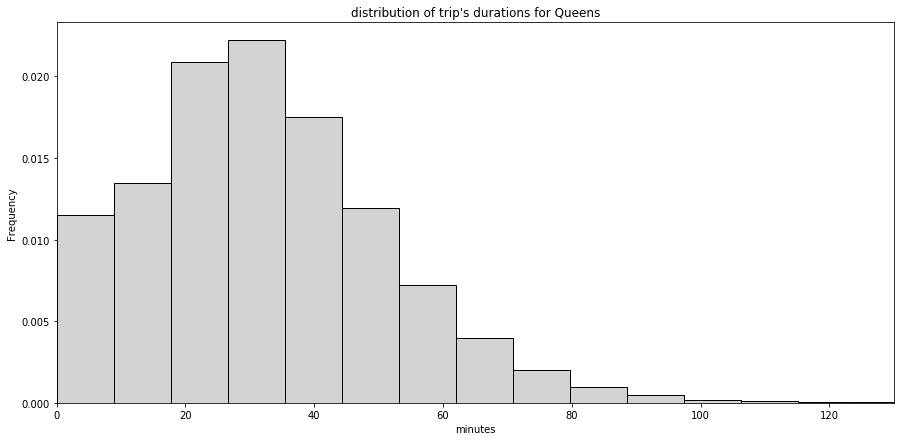

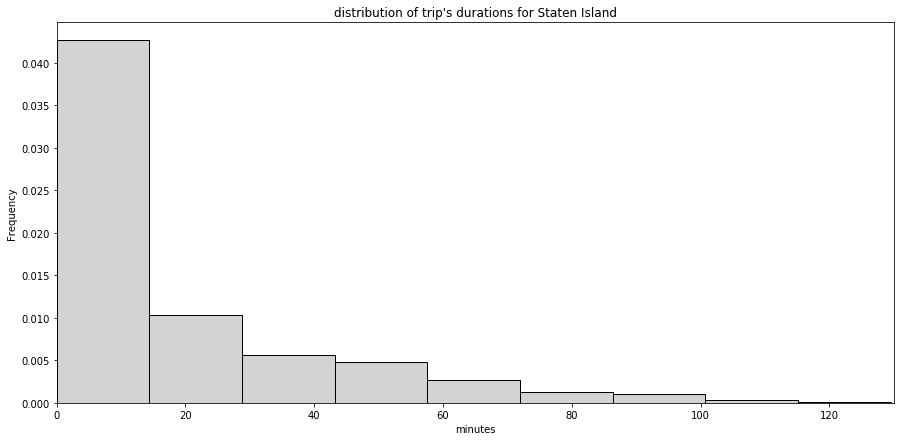

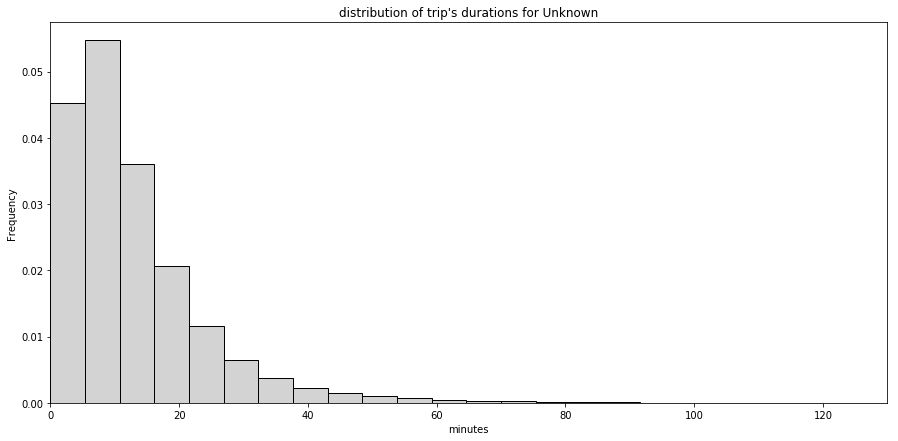

In [44]:
# plot the durations' density for each borough
functions.plot_Boroughs_durations(df, borough_lst)